<a href="https://colab.research.google.com/github/jjhwan-h/ML/blob/main/Multiclass_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#multi-class classification
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [4]:
X, y=make_classification(n_samples=1000, n_classes=3,n_features=20,
                          n_informative=3, random_state=42)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
pred_prob=clf.predict_proba(X_test)

In [8]:
fpr = {}
tpr = {}
thresh = {}
n_class = 3
for i in range(n_class):
  fpr[i],tpr[i],thresh[i] = roc_curve(y_test,pred_prob[:,i],pos_label=i)

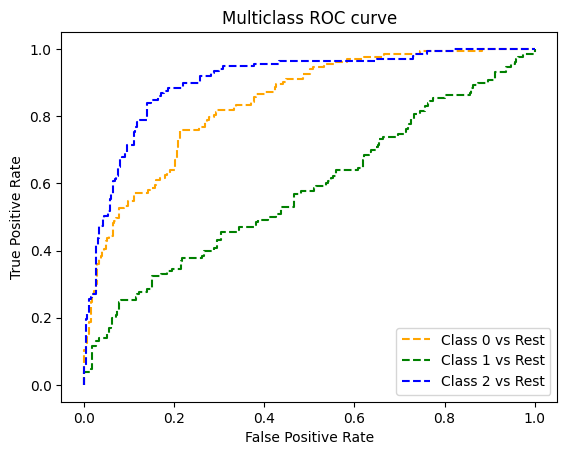

In [12]:
plt.plot(fpr[0],tpr[0],linestyle='--',color='orange',label='Class 0 vs Rest')
plt.plot(fpr[1],tpr[1],linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2],tpr[2],linestyle='--',color='blue',label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)